In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Mission 1. Netfilx and Code


### Mandatory Part
- 한국 작품은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [2]:
nf = pd.read_csv("netflix_titles.csv")
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
korea_product_cnt = nf[nf["country"] == "South Korea"]["country"].count()
print(f'한국 작품은 {korea_product_cnt}개 입니다')

한국 작품은 183개 입니다


### Bonus Part

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [4]:
# 단일 국가인 경우로 필터링 - 어떻게? "country" 에 "," 가 포함되지 않았으면

one_nation = nf[~nf["country"].str.contains(",", na=False)] ## ~는 부정, str 객체 사용
# one_nation = nf[nf["country"].str.contains(",", na=False) == False] <--이것도 가능
freq = one_nation["country"].groupby(by=one_nation["country"]).count()
result = freq[freq == freq.max()]
nation, cnt = list(result.items())[0]

print(f'가장 많은 작품을 만든 나라는 {nation}이고, 총 {cnt}개의 작품을 만들습니다~' )

가장 많은 작품을 만든 나라는 United States이고, 총 2555개의 작품을 만들습니다~


### Mission 2. 가즈아!

### Mandatory Part

- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

    - 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
    - 💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [5]:
coin_df = pd.read_csv("Bitcoin.csv")

coin_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


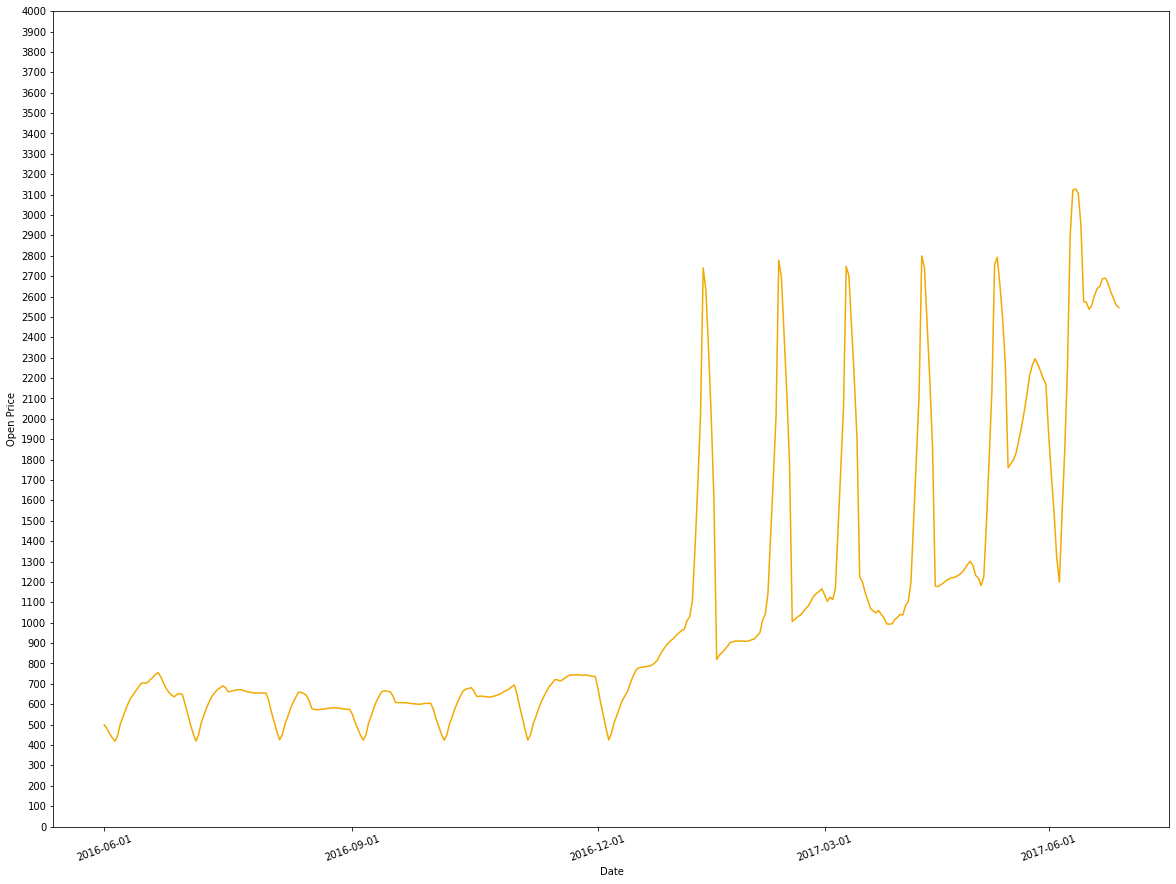

In [6]:
# coin_5ma = 


# .rolling()
coin_df = coin_df.sort_values(["Date"], ascending=True)
coin_df["5MA"] = coin_df["Open"].rolling(window=5).mean()
coin_df.dropna()

# 기간 필터링
target_period = coin_df[coin_df["Date"] >= "2016-06-01"]
target_period = target_period[target_period["Date"] < "2017-07-01"]
target_period

# print(datetime.datetime.stft("2016-06-01"))
fig_size = (20,15) # 그래프 사이즈
plt.figure(figsize = fig_size) # 적용
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(target_period["Date"], target_period["5MA"], color="#f2a900") # 가로축 기준:"Date", 세로축 기준: "5MA", color는 선색
x_tick = ["2016-06-01", "2016-09-01", "2016-12-01", "2017-03-01", "2017-06-01"]
y_tick = [100*i for i in range(41)]
plt.xticks(x_tick, rotation=20)
plt.yticks(y_tick)
plt.show()

### Bonus Part

- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

    - 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

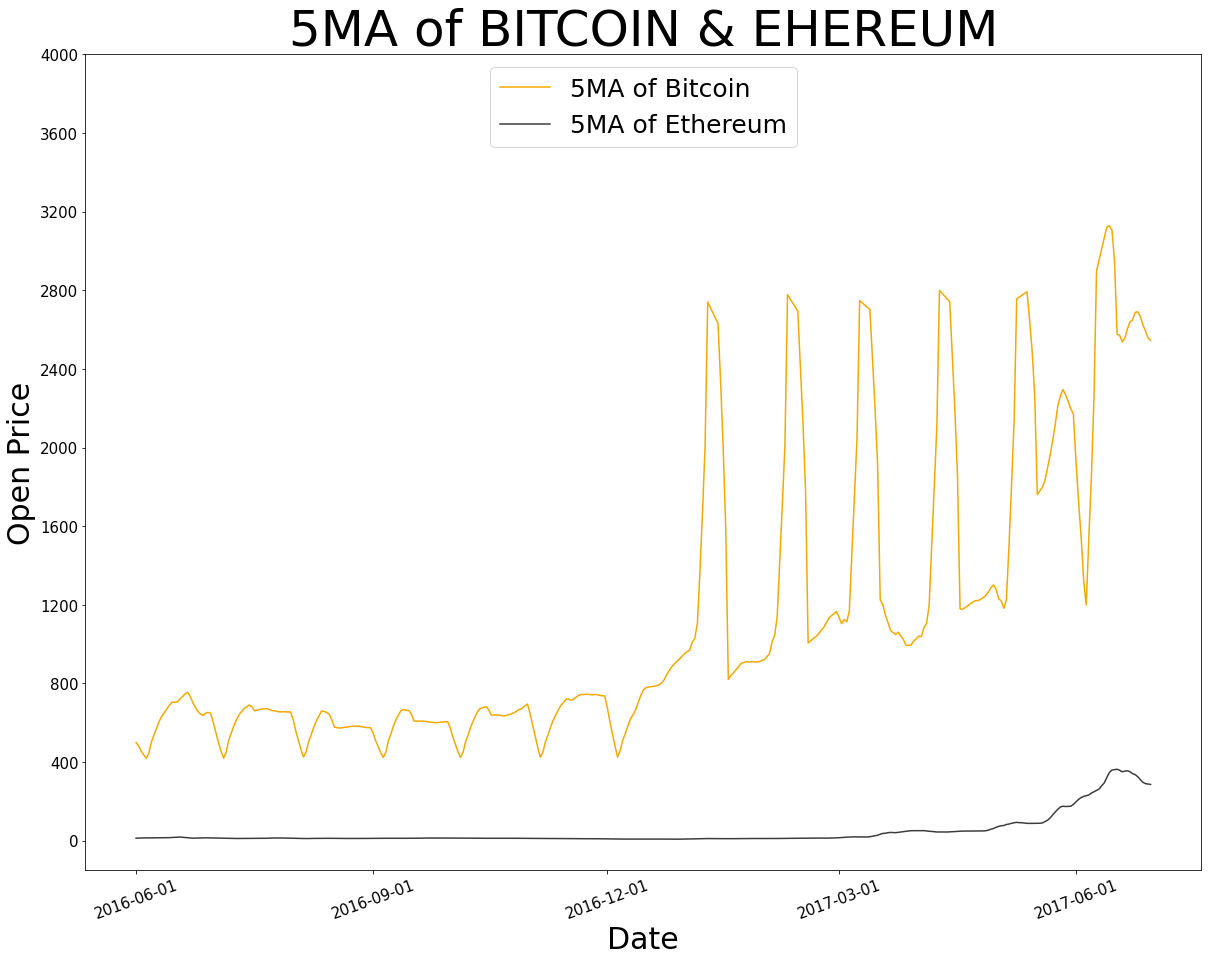

In [9]:
plt.close()

# read csv file

bit_df, eth_df = pd.read_csv("Bitcoin.csv").sort_values(["Date"]), pd.read_csv("ETH_day.csv").sort_values(["Date"])
bit_df = bit_df.set_index("Date")
eth_df = eth_df.set_index("Date")
bit_df["bit_5MA"], eth_df["eth_5MA"] = bit_df["Open"].rolling(window=5).mean(), eth_df["Open"].rolling(window=5).mean()

bit_5ma = bit_df["bit_5MA"]["2016-06-01":"2017-06-30"]
eth_5ma = eth_df["eth_5MA"]["2016-06-01":"2017-06-30"]
five_ma = pd.DataFrame({"bit_5ma":bit_5ma, "eth_5ma": eth_5ma})


# 디자인을 위한 수치
axis_font_size = 15
fig_size = (20,15)
title_size = 50
legend_size = 25
label_size = 30


plt.figure(figsize = fig_size) # 그래프 생성
plt.title("5MA of BITCOIN & EHEREUM", fontsize=50) # title 달기
plt.xlabel("Date", fontsize=label_size) # x축 label 달기
plt.ylabel("Open Price", fontsize=label_size) # y축 label 달기
plt.plot(five_ma.index, five_ma["bit_5ma"].interpolate(), color="#f2a900", label="5MA of Bitcoin") # figure 위에 bit_5ma를 그린다.
plt.plot(five_ma.index, five_ma["eth_5ma"].interpolate(), color="#3c3c3d", label="5MA of Ethereum") # figure 위에 eth_5ma를 그린다.
# .interploate()는 na인 경우 value를 자동으로 채워주는 역할인듯

y_tick = [400*i for i in range(11)] # y축 tick은 400단위로
x_tick = ["2016-06-01", "2016-09-01", "2016-12-01", "2017-03-01", "2017-06-01"] # x축 tick은 분기별로

plt.yticks(y_tick, fontsize=axis_font_size) # tick 적용
plt.xticks(x_tick, rotation=20, fontsize=axis_font_size) # tick 적용

plt.legend(loc=9, fontsize=legend_size) # 범례를 달아준다. loc=9: center upper, default=auto

plt.show() # 그려진 figure 객체를 화면에 출력



